### Regression - Price Predict ###

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
X_test = load_dataset('test.csv')
X_train = load_dataset('train.csv')
y_test = load_dataset('y_test.csv')
y_train = load_dataset('y_train.csv')

X_train = X_train[:-1]
X_test = X_test[:-1]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(10497, 16)
(10497, 1)
(4499, 16)
(4499, 1)


In [2]:
#agrupem i visualitzem les dades test
test=X_test.assign(Price=y_test)
test.head()
test.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
count,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000
mean,2.849,1.107,1.399,2.937,1.486,3.426,52.365,4.889,2.820,18.010,2.993,0.843,0.157,0.778,0.217,0.006,130.806
std,1.230,0.299,0.826,8.796,0.905,11.313,0.016,0.035,5.115,34.887,1.590,0.364,0.364,0.416,0.412,0.074,63.967
min,1.000,0.000,0.000,1.000,1.000,0.000,52.291,4.775,1.000,0.000,0.213,0.000,0.000,0.000,0.000,0.000,23.000
25%,2.000,1.000,1.000,1.000,1.000,1.000,52.356,4.864,2.000,2.000,1.949,1.000,0.000,1.000,0.000,0.000,89.000
50%,2.000,1.000,1.000,1.000,1.000,1.000,52.365,4.887,2.000,7.000,2.854,1.000,0.000,1.000,0.000,0.000,117.000
75%,4.000,1.000,2.000,1.000,2.000,1.000,52.375,4.908,3.000,18.000,3.577,1.000,0.000,1.000,0.000,0.000,150.000
max,16.000,4.000,10.000,91.000,16.000,106.000,52.425,5.028,180.000,408.000,11.593,1.000,1.000,1.000,1.000,1.000,433.000


In [3]:
#agrupem i visualitzem les dades train
train=X_train.assign(Price=y_train)
train.head()
train.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
count,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000,10497.000
mean,2.894,1.120,1.388,2.891,1.505,3.350,52.365,4.889,2.913,17.709,3.001,0.845,0.155,0.777,0.219,0.004,129.730
std,1.327,0.361,0.845,8.854,0.956,11.158,0.016,0.035,7.996,34.719,1.620,0.362,0.362,0.416,0.414,0.061,63.759
min,1.000,0.000,0.000,1.000,1.000,0.000,52.290,4.754,1.000,0.000,0.116,0.000,0.000,0.000,0.000,0.000,19.000
25%,2.000,1.000,1.000,1.000,1.000,1.000,52.356,4.865,2.000,2.000,1.949,1.000,0.000,1.000,0.000,0.000,89.000
50%,2.000,1.000,1.000,1.000,1.000,1.000,52.365,4.886,2.000,7.000,2.837,1.000,0.000,1.000,0.000,0.000,115.000
75%,4.000,1.000,2.000,1.000,2.000,1.000,52.375,4.908,3.000,18.000,3.577,1.000,0.000,1.000,0.000,0.000,150.000
max,17.000,8.000,10.000,91.000,16.000,106.000,52.426,5.027,523.000,496.000,11.842,1.000,1.000,1.000,1.000,1.000,440.000


In [4]:
# mirem si hi ha valors nulls
train.isnull().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_f                0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
Price                             0
dtype: int64

In [5]:
# mirem que no té cap null
train.notnull().sum()

accommodates                      10497
bathrooms                         10497
bedrooms                          10497
calculated_host_listings_count    10497
guests_included                   10497
host_listings_count               10497
latitude                          10497
longitude                         10497
minimum_nights                    10497
number_of_reviews                 10497
d_centre                          10497
instant_bookable_f                10497
instant_bookable_t                10497
room_type_Entire home/apt         10497
room_type_Private room            10497
room_type_Shared room             10497
Price                             10497
dtype: int64

In [6]:
# mirem si te NaN's
train.isna().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_f                0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
Price                             0
dtype: int64

In [7]:
# mirem la correlació de les dades amb el preu
train.corr()['Price']

accommodates                     -0.002
bathrooms                         0.002
bedrooms                         -0.005
calculated_host_listings_count   -0.002
guests_included                   0.012
host_listings_count              -0.004
latitude                          0.010
longitude                         0.015
minimum_nights                   -0.005
number_of_reviews                 0.003
d_centre                         -0.014
instant_bookable_f               -0.003
instant_bookable_t                0.003
room_type_Entire home/apt         0.003
room_type_Private room           -0.000
room_type_Shared room            -0.019
Price                             1.000
Name: Price, dtype: float64

In [8]:
corr = train.corr()
priceCorr = corr.Price.sort_values(ascending = False)
print('Most Positive Correlations\n',priceCorr.head(),'\n')
print('Most Negative Correlations\n', priceCorr.tail())

Most Positive Correlations
 Price                1.000
longitude            0.015
guests_included      0.012
latitude             0.010
instant_bookable_t   0.003
Name: Price, dtype: float64 

Most Negative Correlations
 host_listings_count     -0.004
bedrooms                -0.005
minimum_nights          -0.005
d_centre                -0.014
room_type_Shared room   -0.019
Name: Price, dtype: float64


<IPython.core.display.Javascript object>


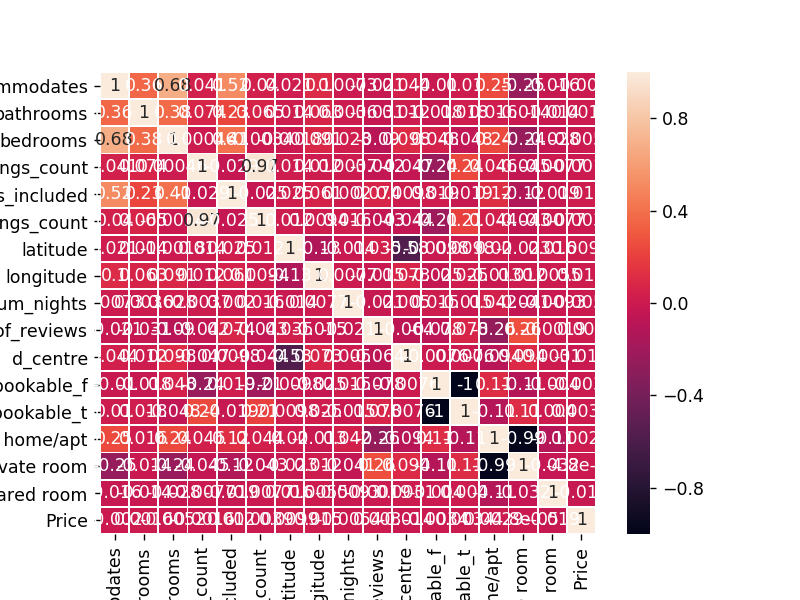

In [9]:
import seaborn as sns

#Mirem la correlació entre els atributs d'entrada per entendre millor les dades
#train_binary=train
#train_binary.head()
    
correlacio = train.corr()

#plt.figure(figsize=(15,10))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)


In [95]:
#relacio = sns.pairplot(train)

Primer fem la predicció amb les dades no normalitzades

In [27]:
#split by the most correlated features
X_Correlated_train =pd.DataFrame(X_train, columns=['longitude', 'guests_included', 'latitude', 'room_type_Shared room', 'd_centre'])
X_Correlated_test =pd.DataFrame(X_test, columns=['longitude', 'guests_included', 'latitude', 'room_type_Shared room', 'd_centre'])

print("shape correlated train: ", X_Correlated_train.shape)
print("shape correlated test: ", X_Correlated_test.shape)

X_Most_Correlated_train =pd.DataFrame(X_train, columns=['room_type_Shared room'])
X_Most_Correlated_test =pd.DataFrame(X_test, columns=['room_type_Shared room'])


shape correlated train:  (10497, 5)
shape correlated test:  (4499, 5)


1. Linear Regression multiple amb totes les dades, les que més correlacionen i la que més correlaciona.

Error mitjà d'entrenament:  4059.9299955221477
Error mitjà de test:  4102.732010893084


<IPython.core.display.Javascript object>


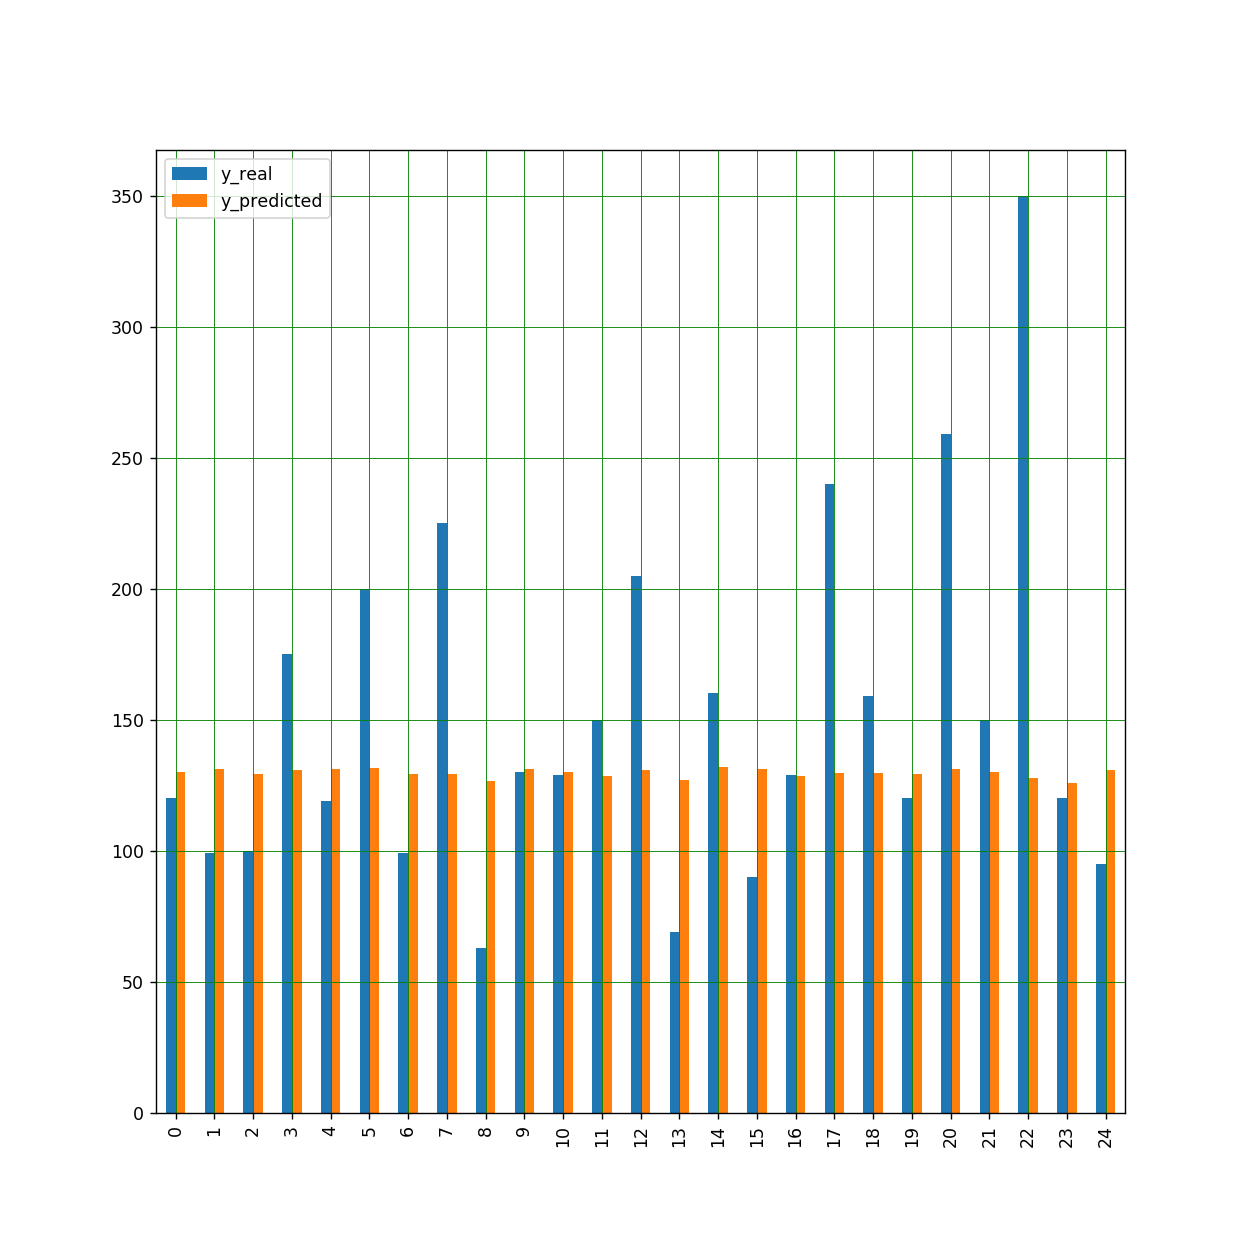

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

# Linear regression with all features
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted)
test_MSD = mean_squared_error(y_test, y_test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)


#df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_predicted}, index=range(len(y_train)))
df = y_train.assign(y_predicted=y_train_predicted)
df = df.rename(columns={'160.0' : 'y_real'})
df
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


Error mitjà d'entrenament:  4061.0384570514393
Error mitjà de test:  4097.2402595991525


<IPython.core.display.Javascript object>


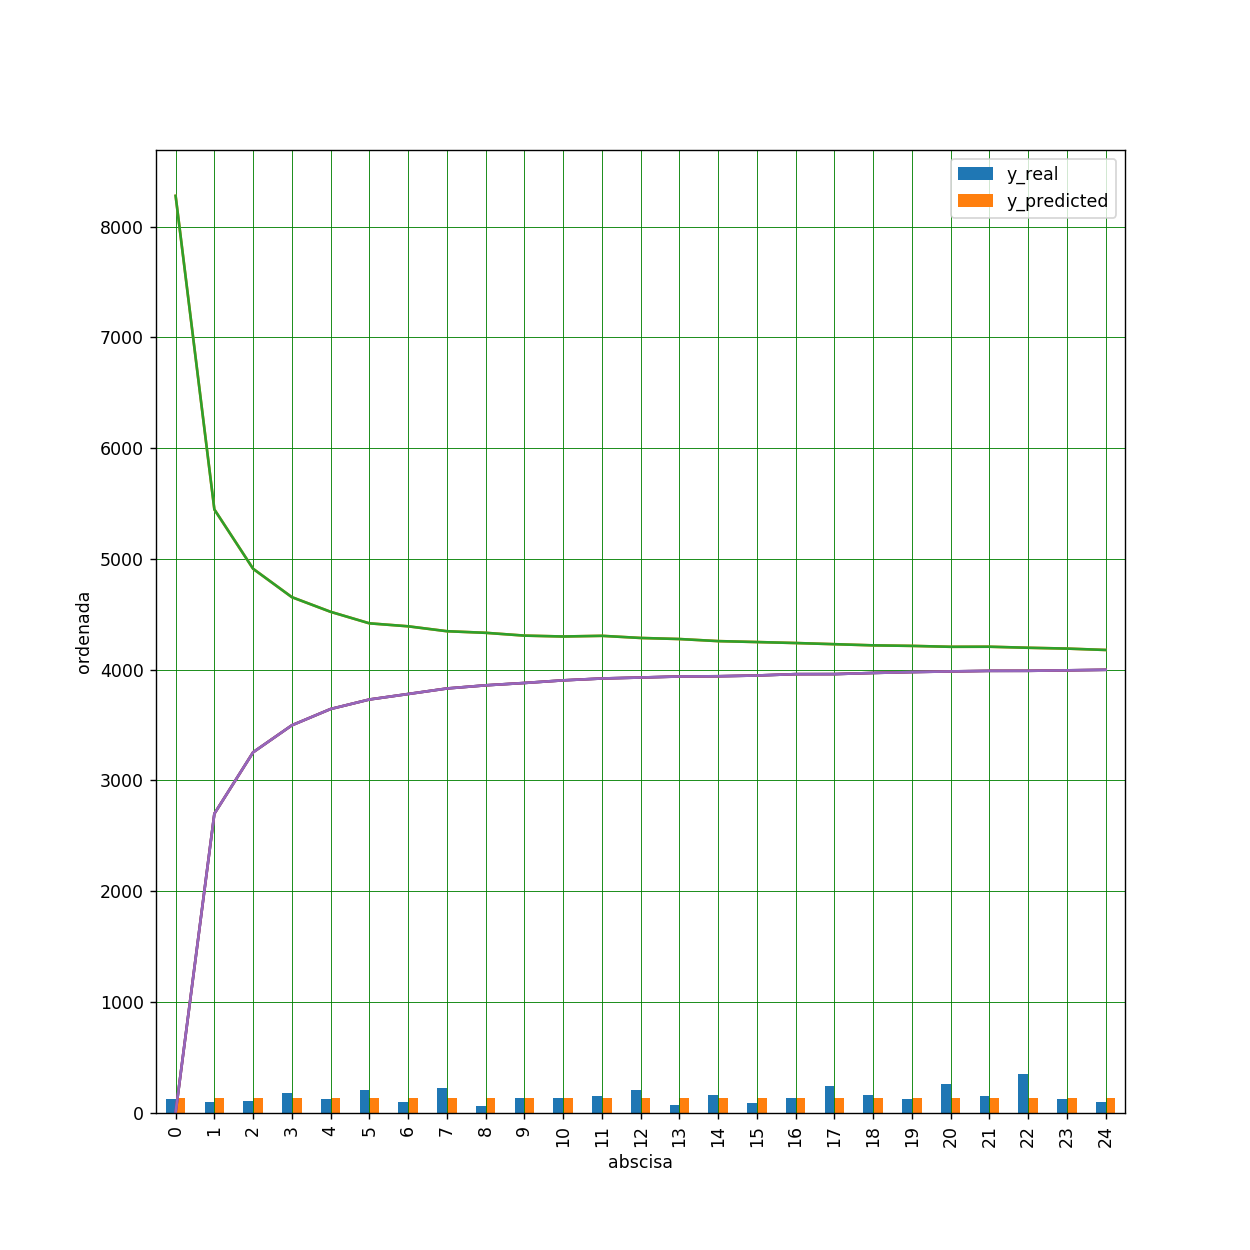

In [14]:
# Linear regression with the most correlated features

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_Correlated_train, y_train)

y_train_predicted = linear_regression.predict(X_Correlated_train)
y_test_predicted = linear_regression.predict(X_Correlated_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted)
test_MSD = mean_squared_error(y_test, y_test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)

df = y_train.assign(y_predicted=y_train_predicted)
df = df.rename(columns={'160.0' : 'y_real'})
df
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Error mitjà d'entrenament:  4063.3785989309526
Error mitjà de test:  4092.6517783808813


<IPython.core.display.Javascript object>


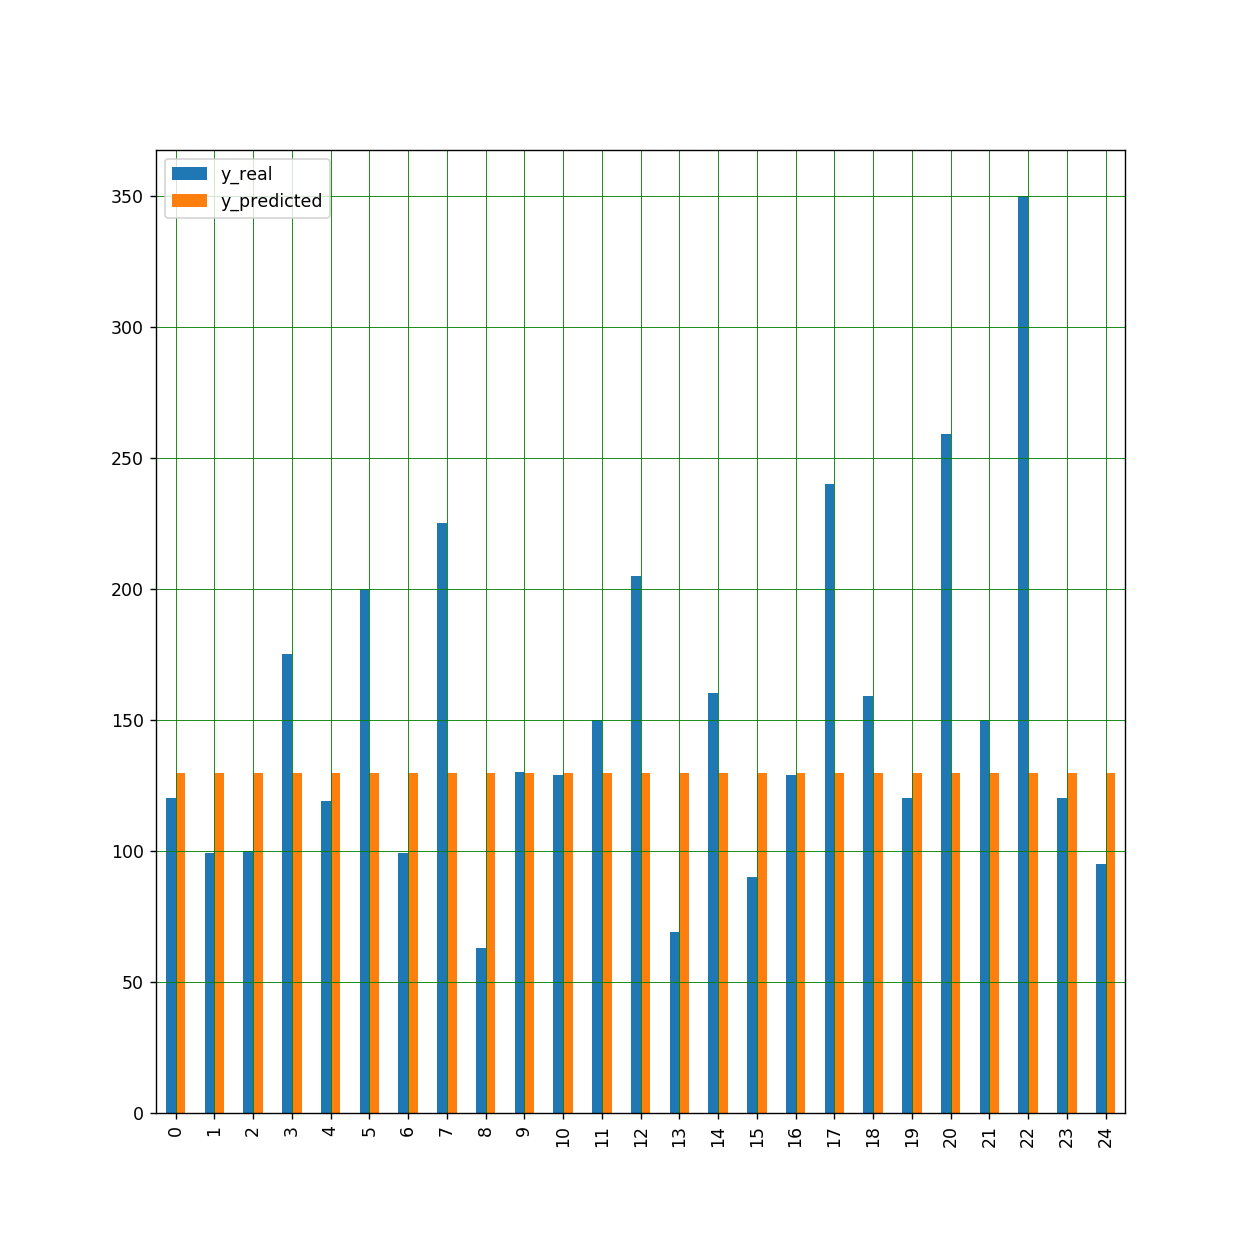

In [13]:
# Linear regression with the most correlated feature

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_Most_Correlated_train, y_train)

y_train_predicted = linear_regression.predict(X_Most_Correlated_train)
y_test_predicted = linear_regression.predict(X_Most_Correlated_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted)
test_MSD = mean_squared_error(y_test, y_test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)

df = y_train.assign(y_predicted=y_train_predicted)
df = df.rename(columns={'160.0' : 'y_real'})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

2. Multifeature polinomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [37]:
#Multi-featrues polinomial regression with all the featrues
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted)
poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted)
print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ",poly_test_MSD)

KeyboardInterrupt: 

In [33]:
print("x poly shape: ", X_poly.shape)

x poly shape:  (10497, 152)


In [31]:
#Multi-featrues polinomial regression with the most correlated featrues
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_Correlated_train)
X_poly_test = poly.fit_transform(X_Correlated_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted)
poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted)
print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ",poly_test_MSD)


shape X poly test:  (4499, 20)
shape X poly train:  (10497, 20)
Error mitjà d'entrenament:  4058.0030998577786
Error mitjà de test:  4105.4640064505975


In [35]:
#Multi-featrues polinomial regression with the most correlated featrue
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_Most_Correlated_train)
X_poly_test = poly.fit_transform(X_Most_Correlated_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted)
poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted)
print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ",poly_test_MSD)

Error mitjà d'entrenament:  4063.3785989309526
Error mitjà de test:  4092.6517783808813


El resultat obtingut és amb polinomis de grau 2, i veiem que és pitjor que amb un regressor lineal. I si augmentem els graus pitjor és el resultat fins al punt que no es pot calcular (grau 4)

3. KNN regressor

In [57]:
from sklearn.neighbors import KNeighborsRegressor
accuracy_test=[]
accuracy_train=[]
num=[]
for i in range(1,50,2):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train, y_train) 
    test_predicted = KNN.predict(X_test)
    train_predicted = KNN.predict(X_train)
    num.append(i)
    accuracy_train.append(KNN.score(X_train, y_train))
    accuracy_test.append(KNN.score(X_test, y_test))
    #print("Error mitjà d'entrenament per", i ,"veins: ", train_MSD)
    #print("Error mitjà de test per", i ,"veins: ", test_MSD)

<IPython.core.display.Javascript object>


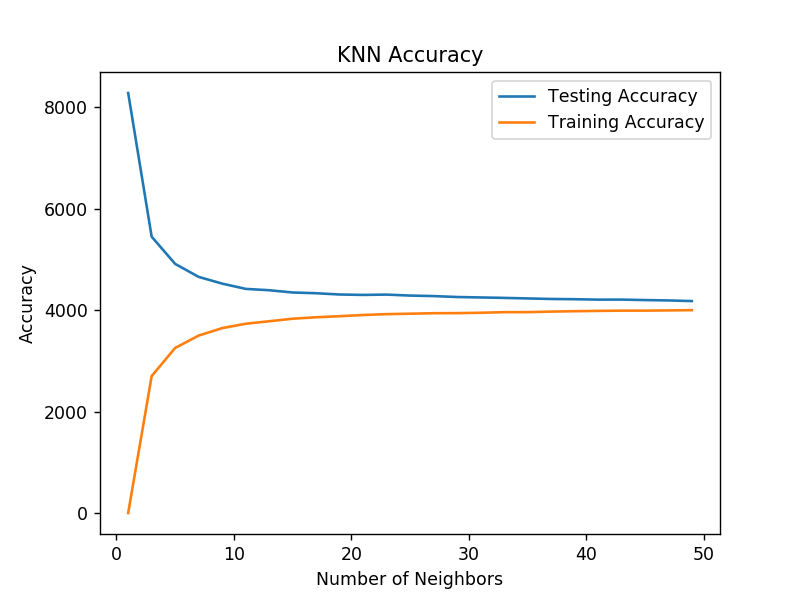

In [60]:
plt.figure()
plt.title('KNN Accuracy')
plt.plot(num, error_test, label = 'Testing Accuracy')
plt.plot(num, error_train, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor() 

In [ ]:
random_forest.fit(dataset_train_x, dataset_train_y)
y_pred = random_forest.predict(dataset_test_x) 
y_pred=y_pred.reshape(-1,1)
print(dataset_train_x.shape,dataset_train_y.shape,dataset_test_x.shape,dataset_test_y.shape,y_pred.shape)
error = abs(y_pred - dataset_test_y)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(error), 2), 'degrees.')
mape = 100 * (error / dataset_test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


In [ ]:
plt.plot(error)

Models de regressió:
- Regressió Lineal
- Regressió Multilineal
- Logistic regression
- Descens del gràdient

Ensemble learning
- Random  Forest
- Decision Tree


Mirar lo dels hyperparametres

Estandarització de les dades

In [ ]:
# normalitzem les dades
from sklearn import preprocessing
dataset_train_numeric_columns = preprocessing.normalize(dataset_train.drop(columns =['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi','price_range'], axis=1))
dataset_train_numeric_columns = pd.DataFrame(dataset_train_numeric_columns, columns=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time'])
dataset_train_numeric_columns.head()
dataset_train_binary_columns=dataset_train.drop(columns=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time'], axis=1)
dataset_train_normalized = pd.concat([dataset_train_numeric_columns, dataset_train_binary_columns], axis=1)
dataset_train_normalized